In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


Decision Tree Accuracy: 0.9661633109619687
Random Forest Accuracy: 0.9807046979865772

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.61      0.75       173

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



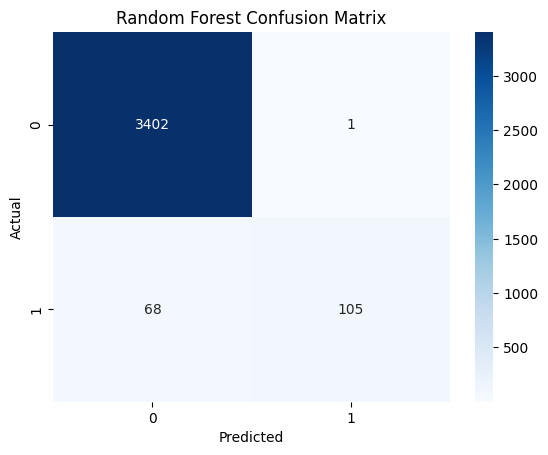

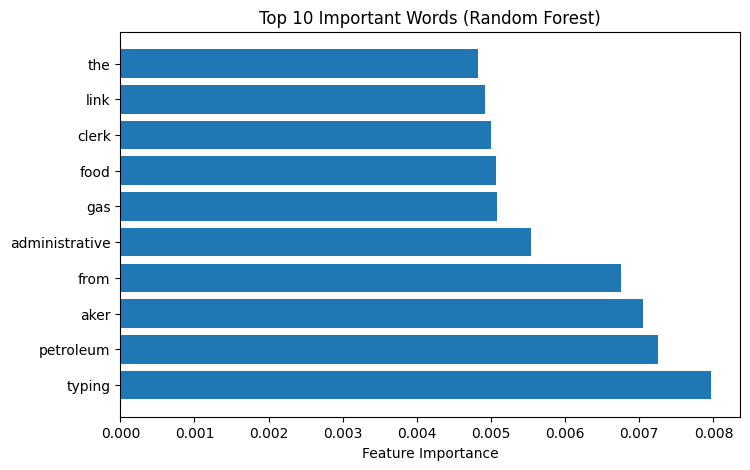

In [ ]:
# Day 6: Decision Tree & Random Forest Models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed dataset
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1 Decision Tree
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 2 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance
importances = rf.feature_importances_
indices = importances.argsort()[-10:][::-1]
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Words (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()